### Imorting Libraries

In [30]:
# Calling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import spacy
import time
import warnings
import seaborn as sns
from spacy import displacy
Text_Visualization = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob
%pip install emoji
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from yellowbrick.cluster import KElbowVisualizer
pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [16, 10]

[nltk_data] Downloading package punkt to C:\Users\Mohamed
[nltk_data]     Makki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Read & Data Analysis

In [31]:
# Read Data
data = pd.read_csv(r'C:\Users\Mohamed Makki\Desktop\tweets.csv', encoding='ISO-8859-1', header=None)
data = data.sample(10000)
data.head()

,0,1,2,3,4,5
733818,0,2264406219,Sun Jun 21 03:46:18 PDT 2009,NO_QUERY,rubikah,@nerearoldan miss u too. I miss the afternoon hugs with u
791738,0,2326048535,Thu Jun 25 06:28:32 PDT 2009,NO_QUERY,classyklb,"tired, not feeling so hot."
106867,0,1823712061,Sat May 16 22:45:05 PDT 2009,NO_QUERY,mistakepro,@allcheckeredout why not ?!?!?!
1498886,4,2070662753,Sun Jun 07 18:05:23 PDT 2009,NO_QUERY,Crazy4Jericho,@Dodjet Ah okay. Lol. Thanks for the link.
282625,0,1992679241,Mon Jun 01 09:08:51 PDT 2009,NO_QUERY,helicounsel,@fhgrl33 also a good one! Too bad she's done .... for the season...


In [32]:
# Create a name for each column to modify them easy
data.columns = ['Target', 'ID', 'Date', 'NO_QUERY', 'Auther', 'Post']

data.head()

,Target,ID,Date,NO_QUERY,Auther,Post
733818,0,2264406219,Sun Jun 21 03:46:18 PDT 2009,NO_QUERY,rubikah,@nerearoldan miss u too. I miss the afternoon hugs with u
791738,0,2326048535,Thu Jun 25 06:28:32 PDT 2009,NO_QUERY,classyklb,"tired, not feeling so hot."
106867,0,1823712061,Sat May 16 22:45:05 PDT 2009,NO_QUERY,mistakepro,@allcheckeredout why not ?!?!?!
1498886,4,2070662753,Sun Jun 07 18:05:23 PDT 2009,NO_QUERY,Crazy4Jericho,@Dodjet Ah okay. Lol. Thanks for the link.
282625,0,1992679241,Mon Jun 01 09:08:51 PDT 2009,NO_QUERY,helicounsel,@fhgrl33 also a good one! Too bad she's done .... for the season...


In [33]:
# data information
data.shape
print('---------------------------------')
data.describe()
print('---------------------------------')
data.info()
print('---------------------------------')
data.dtypes

---------------------------------
---------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 733818 to 1205435
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    10000 non-null  int64 
 1   ID        10000 non-null  int64 
 2   Date      10000 non-null  object
 3   NO_QUERY  10000 non-null  object
 4   Auther    10000 non-null  object
 5   Post      10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB
---------------------------------


Target       int64
ID           int64
Date        object
NO_QUERY    object
Auther      object
Post        object
dtype: object

In [34]:
# no. of Target values
data['Target'].value_counts()

Target
0    5106
4    4894
Name: count, dtype: int64

### Cleaning Data

* Lowercasing all the letters

In [35]:
data['results'] = data['Post'].str.lower()
display(data)

,Target,ID,Date,NO_QUERY,Auther,Post,results
733818,0,2264406219,Sun Jun 21 03:46:18 PDT 2009,NO_QUERY,rubikah,@nerearoldan miss u too. I miss the afternoon hugs with u,@nerearoldan miss u too. i miss the afternoon hugs with u
791738,0,2326048535,Thu Jun 25 06:28:32 PDT 2009,NO_QUERY,classyklb,"tired, not feeling so hot.","tired, not feeling so hot."
106867,0,1823712061,Sat May 16 22:45:05 PDT 2009,NO_QUERY,mistakepro,@allcheckeredout why not ?!?!?!,@allcheckeredout why not ?!?!?!
1498886,4,2070662753,Sun Jun 07 18:05:23 PDT 2009,NO_QUERY,Crazy4Jericho,@Dodjet Ah okay. Lol. Thanks for the link.,@dodjet ah okay. lol. thanks for the link.
282625,0,1992679241,Mon Jun 01 09:08:51 PDT 2009,NO_QUERY,helicounsel,@fhgrl33 also a good one! Too bad she's done .... for the season...,@fhgrl33 also a good one! too bad she's done .... for the season...
...,...,...,...,...,...,...,...
603315,0,2221630537,Thu Jun 18 05:44:14 PDT 2009,NO_QUERY,allly,end of music not so messy today!,end of music not so messy today!
1134961,4,1976427803,Sat May 30 17:18:26 PDT 2009,NO_QUERY,SongoftheOss,@itsonlymeGilly welcome back you and ignore everything you read about me it is nearly almost slightly lies,@itsonlymegilly welcome back you and ignore everything you read about me it is nearly almost slightly lies
510654,0,2189706193,Tue Jun 16 00:41:48 PDT 2009,NO_QUERY,Jessiemay_,@elenarr thats sucks heaps oh ur still there,@elenarr thats sucks heaps oh ur still there
249897,0,1983081340,Sun May 31 12:28:07 PDT 2009,NO_QUERY,phoebeC,Has a headache and I think a fever #pigbirdcowflu,has a headache and i think a fever #pigbirdcowflu


* Removing Consecutive letters

In [36]:
# Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. ( eg: 'Heyyyy' to 'Heyy' )
# cause some words like 'all' if we replace 'll' with only one 'l' will lose thhe meaning
# str = 'heyyyy'
# print(re.sub(r'(.)\1\1+', r'\1\1', str))
# output will be : heyy

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1\1+', r'\1\1', text)
data['results'] = data['results'].apply(lambda x: cleaning_repeating_char(x))
data['results'].tail()

603315                                                                                   end of music  not so messy today!
1134961        @itsonlymegilly welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                       @elenarr  thats sucks heaps oh ur still there
249897                                                                  has a headache and i think a fever  #pigbirdcowflu
1205435    thank the stars, ie is dead! hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

* Replace all emojis

In [37]:
# Ex: The emoji 💣 or the shortade :bomb: will be converted to 'bomb' its meaning in English by Demojize
data['results'] = data['results'].apply(lambda x: emoji.demojize(x, language='es'))
data['results'].tail()

603315                                                                                   end of music  not so messy today!
1134961        @itsonlymegilly welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                       @elenarr  thats sucks heaps oh ur still there
249897                                                                  has a headache and i think a fever  #pigbirdcowflu
1205435    thank the stars, ie is dead! hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

* Remove Hashtags

In [38]:
def cleaning_hashtag(hash):
    hash_pattern = re.compile(r'#[A-Za-z0-9_]+')
    return hash_pattern.sub(r'', hash)

data['results'] = data['results'].apply(lambda x: cleaning_hashtag(x))
data['results'].tail()

603315                                                                                   end of music  not so messy today!
1134961        @itsonlymegilly welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                       @elenarr  thats sucks heaps oh ur still there
249897                                                                                has a headache and i think a fever  
1205435    thank the stars, ie is dead! hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

* Remove @ or mentions

In [39]:
def cleaning_ment(ment):
    ment_pattern = re.compile(r'@[A-Za-z0-9_]+')
    return ment_pattern.sub(r'', ment)

data['results'] = data['results'].apply(lambda x: cleaning_ment(x))
data['results'].tail()

603315                                                                                   end of music  not so messy today!
1134961                        welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                                 thats sucks heaps oh ur still there
249897                                                                                has a headache and i think a fever  
1205435    thank the stars, ie is dead! hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

* Remove links

In [40]:
def cleaning_link(link):
    link_pattern = re.compile(r'http\S+|www.\S+|<.*?>')
    return link_pattern.sub(r'', link)

data['results'] = data['results'].apply(lambda x: cleaning_link(x))
data['results'].tail()

603315                                                                                   end of music  not so messy today!
1134961                        welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                                 thats sucks heaps oh ur still there
249897                                                                                has a headache and i think a fever  
1205435    thank the stars, ie is dead! hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

### Visualization

* Visualizing the dependency

In [41]:
doc_dep = data['results'][:5].apply(lambda x: Text_Visualization(x))
option_dep = {'distance': 100, 'color': '#30cBb6', 'bg': '#193380', 'font': 'Arial'}
displacy.render(doc_dep, style='dep', jupyter=True, options=option_dep)

* Visualizing the entity recognizer

In [42]:
doc_ent = data['results'][:10].apply(lambda x: Text_Visualization(x))
# doc_ent.user_data['title] = 'ENT'
displacy.render(doc_ent, style='ent', jupyter=True)

* Remove puctuations and non-alphanumeric

In [43]:
# remove (anything not alphanumeric, whitespace or digit)
def cleaning_punc(punc):
    for char in string.punctuation:
        punc = punc.replace(char, '')
    return punc

data['results'] = data['results'].apply(cleaning_punc)
data['results'].tail()

603315                                                                                  end of music  not so messy today
1134961                      welcome back you and ignore everything you read about me it is nearly almost slightly lies 
510654                                                                               thats sucks heaps oh ur still there
249897                                                                              has a headache and i think a fever  
1205435    thank the stars ie is dead hopefully they pick webkit and join the crowd  microsoft has a serious case of nih
Name: results, dtype: object

* Tokenization

In [44]:
data['results'] = data['results'].apply(lambda x: word_tokenize(x))
data['results'].tail()

603315                                                                                                [end, of, music, not, so, messy, today]
1134961                           [welcome, back, you, and, ignore, everything, you, read, about, me, it, is, nearly, almost, slightly, lies]
510654                                                                                            [thats, sucks, heaps, oh, ur, still, there]
249897                                                                                            [has, a, headache, and, i, think, a, fever]
1205435    [thank, the, stars, ie, is, dead, hopefully, they, pick, webkit, and, join, the, crowd, microsoft, has, a, serious, case, of, nih]
Name: results, dtype: object

* Remove stop words

In [45]:
# import stopwords with skikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

# add new column 'results' to asign 'post' column without stop words
data['results'] = data['results'].apply(lambda x: [items for items in x if items not in stop])

tokenword = data['Post'].apply(lambda x: word_tokenize(x))
res = data['results']

In [46]:
print('Tokenized words:\n ', tokenword)
print('---------------------------------')
print('\nNo-Stopwords:\n ', res)
print('---------------------------------')
data

Tokenized words:
  733818                                                                    [@, nerearoldan, miss, u, too, ., I, miss, the, afternoon, hugs, with, u]
791738                                                                                                         [tired, ,, not, feeling, so, hot, .]
106867                                                                                             [@, allcheckeredout, why, not, ?, !, ?, !, ?, !]
1498886                                                                                 [@, Dodjet, Ah, okay, ., Lol, ., Thanks, for, the, link, .]
282625                                                    [@, fhgrl33, also, a, good, one, !, Too, bad, she, 's, done, ...., for, the, season, ...]
                                                                             ...                                                                   
603315                                                                                       

,Target,ID,Date,NO_QUERY,Auther,Post,results
733818,0,2264406219,Sun Jun 21 03:46:18 PDT 2009,NO_QUERY,rubikah,@nerearoldan miss u too. I miss the afternoon hugs with u,"[miss, u, miss, afternoon, hugs, u]"
791738,0,2326048535,Thu Jun 25 06:28:32 PDT 2009,NO_QUERY,classyklb,"tired, not feeling so hot.","[tired, feeling, hot]"
106867,0,1823712061,Sat May 16 22:45:05 PDT 2009,NO_QUERY,mistakepro,@allcheckeredout why not ?!?!?!,[]
1498886,4,2070662753,Sun Jun 07 18:05:23 PDT 2009,NO_QUERY,Crazy4Jericho,@Dodjet Ah okay. Lol. Thanks for the link.,"[ah, okay, lol, thanks, link]"
282625,0,1992679241,Mon Jun 01 09:08:51 PDT 2009,NO_QUERY,helicounsel,@fhgrl33 also a good one! Too bad she's done .... for the season...,"[good, bad, shes, season]"
...,...,...,...,...,...,...,...
603315,0,2221630537,Thu Jun 18 05:44:14 PDT 2009,NO_QUERY,allly,end of music not so messy today!,"[end, music, messy, today]"
1134961,4,1976427803,Sat May 30 17:18:26 PDT 2009,NO_QUERY,SongoftheOss,@itsonlymeGilly welcome back you and ignore everything you read about me it is nearly almost slightly lies,"[welcome, ignore, read, nearly, slightly, lies]"
510654,0,2189706193,Tue Jun 16 00:41:48 PDT 2009,NO_QUERY,Jessiemay_,@elenarr thats sucks heaps oh ur still there,"[thats, sucks, heaps, oh, ur]"
249897,0,1983081340,Sun May 31 12:28:07 PDT 2009,NO_QUERY,phoebeC,Has a headache and I think a fever #pigbirdcowflu,"[headache, think, fever]"


In [47]:
# data['Post'] = data['Post'].apply(lambda x: ' '.join(x))
data['results'] = data['results'].apply(lambda x: ' '.join(x))

type(data.results.values)

numpy.ndarray

In [48]:
type(data.Post)

pandas.core.series.Series

In [49]:
df = data[data['results'].notnull()]

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['results'] = le.fit_transform(df.results.values)

* t-Distributed Stochastic Neighbor Embedding

In [ ]:
# tsne code from this great kernel: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# New_df is from the random undersample data (fewer instances)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import time

# حوّل النصوص لتمثيل عددي (features)
vectorizer = TfidfVectorizer(max_features=500)  # تقدر تزود/تقلل max_features
X_vec = vectorizer.fit_transform(df['results'].astype(str))

# طبّق T-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_vec.toarray())
t1 = time.time()

print('T-SNE took {:.2f} s'.format(t1 - t0))


T-SNE took 20.91 s


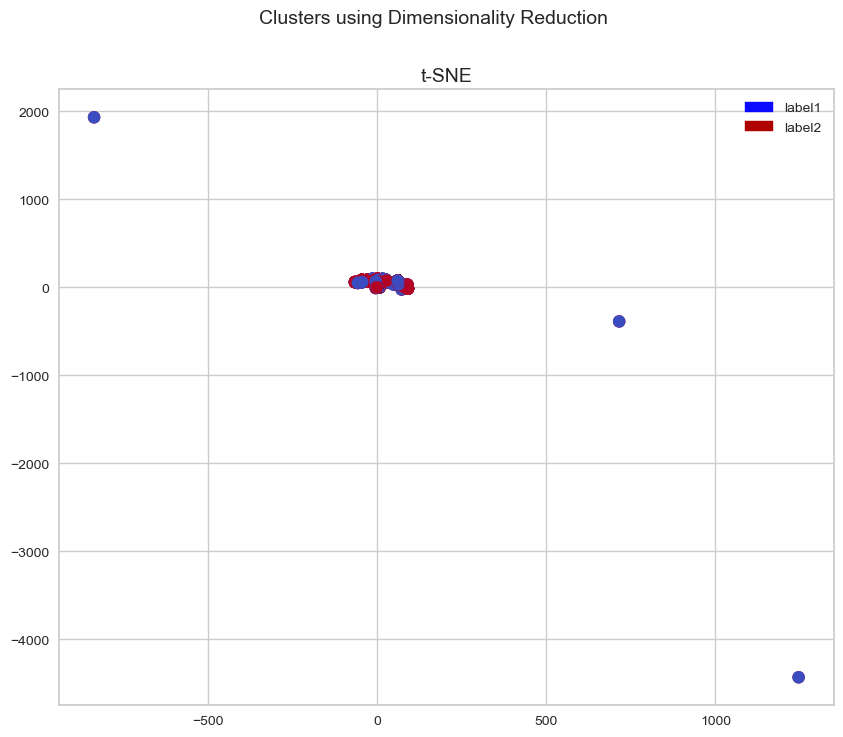

In [61]:
f, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
# labels = ['label1', 'label2']
f.suptitle('Clusters using Dimensionality Reduction', fontsize = 14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='label1')
red_patch = mpatches.Patch(color='#AF0000', label='label2')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='label1', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 4), cmap='coolwarm', label='label2', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
plt.show()

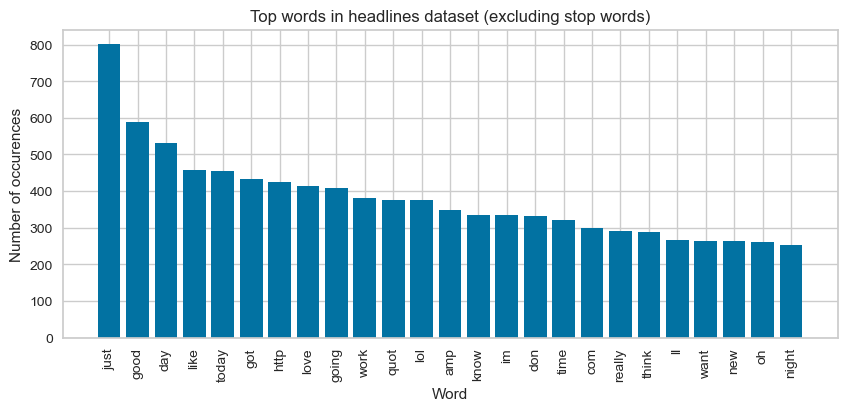

In [60]:
reindexed_data = data['Post'] #.str.decode('utf-8', errors='ignore')

# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):

    ''''
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    
    '''
    count_data = count_vectorizer.fit_transform(text_data)
    word_counts = np.asarray(count_data.sum(axis=0)).flatten()

    sorted_indices = word_counts.argsort()[::-1][:n_top_words]

    words = np.array(count_vectorizer.get_feature_names_out())[sorted_indices]
    word_values = word_counts[sorted_indices]

    return list(words), list(word_values)

Count_Vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25, count_vectorizer=Count_Vectorizer, text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()


### Using NLP Tools

* TFIDF

In [62]:
vec = TfidfVectorizer(stop_words='english')

vec.fit(data.Post.values)
features = vec.transform(data.results.values)

### Clustering

* MiniBatchKMeans

In [66]:
print("طول K:", len(K))
print("طول distortions:", len(distortions))


TypeError: object of type 'int' has no len()

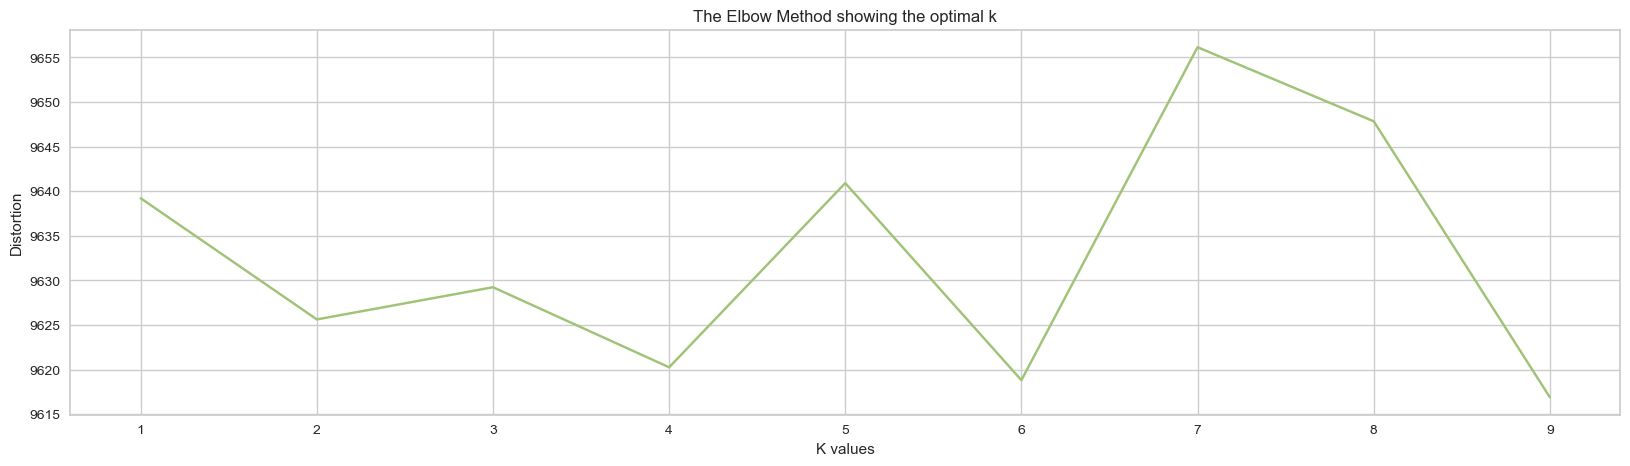

In [70]:
distortions = []
K_range = range(1, 10)

for K in K_range:
    Kmean = KMeans()
    Kmean.fit(features)
    distortions.append(Kmean.inertia_)

plt.figure(figsize=(20, 5))
plt.plot(list(K_range), distortions, linestyle='-', color='g')
plt.xlabel('K values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [71]:
cls = MiniBatchKMeans(3, random_state=1000, max_iter=200)
cls.fit(features)

MiniBatchKMeans(max_iter=200, n_clusters=3, random_state=1000)

In [72]:
y_predict = cls.predict(features)

In [73]:
cls.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
len(cls.cluster_centers_), len(cls.cluster_centers_[0])

(3, 18384)

* PCA

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features.toarray())

In [82]:
X_pca

array([[-0.02305827, -0.0170948 ],
       [ 0.00292365, -0.01636765],
       [-0.03026124, -0.01462432],
       ...,
       [-0.02324771, -0.00739528],
       [-0.02296005, -0.00500745],
       [-0.03459897, -0.0197321 ]])

* KMeans

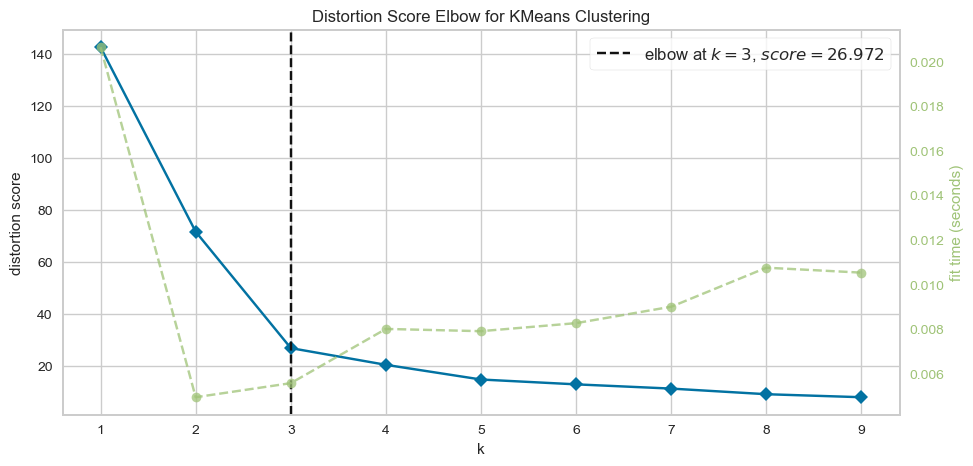

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10), size=(1080, 500))

visualizer.fit(X_pca)
visualizer.show()

In [84]:
kmeanModel = KMeans(n_clusters=3, random_state=1000)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

,x,y
0,-0.028813,-0.013911


In [85]:
dfcl = pd.DataFrame(columns=['x', 'y', 'label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(1)

,x,y,label
0,-0.023058,-0.017095,0


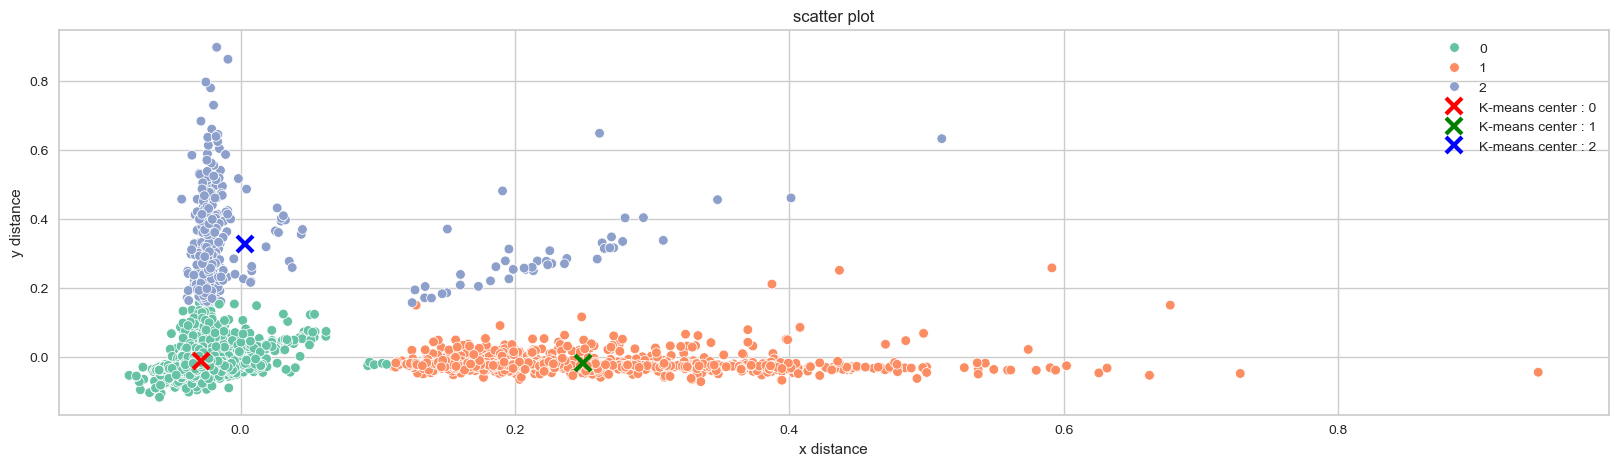

In [88]:
plt.figure(figsize=(20, 5))

sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=pred_labels.tolist(), 
    palette='Set2'
)

colors = ['red', 'green', 'blue', 'yellow']

for i in range(len(df_centers)):
    plt.plot(
        df_centers['x'][i], 
        df_centers['y'][i], 
        'x', 
        label=f'K-means center : {i}', 
        color=colors[i % len(colors)], 
        markersize=12, 
        markeredgewidth=3
    )

plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')
plt.legend()
plt.show()


### Evaluation

In [89]:
order_centroids = cls.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[12202,    65, 13811, ..., 18370, 18369, 18368],
       [ 7918,  8750,  4974, ...,    15,    14, 18380],
       [ 2928, 17823, 14516, ..., 18370, 18369, 18368]])

In [91]:
terms = vec.get_feature_names_out()
terms

array(['00', '000', '000th', ..., 'ð¾ð²ðµñ', 'ð¾ð½ñ', 'ð¾ñ'], dtype=object)

In [92]:
for i in range(3):
    print('Cluster %d: ' % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
    print('------------------------------------------------')

Cluster 0: 
 pastor
 1229time
 roof
 headin
 blew
 message
 tom
 david
 place
 morning
 home
 100k
 1001
 1000
 100
 10
 0wskhj
 0r
 0mgg
 0mgeesh
------------------------------------------------
Cluster 1: 
 im
 just
 dont
 good
 day
 love
 work
 got
 going
 thanks
 today
 lol
 like
 know
 na
 want
 time
 home
 really
 ill
------------------------------------------------
Cluster 2: 
 calln
 wks
 shes
 iran
 wtf
 saying
 bye
 airport
 ago
 mom
 year
 way
 got
 1001
 1000
 100
 10
 0wskhj
 0r
 0mgg
------------------------------------------------


In [93]:
Y = vec.transform(['mexico airport are explosed'])
prediction = cls.predict(Y)
print(prediction)

[1]


In [94]:
Y = vec.transform(['i got to go work. '])
prediction = cls.predict(Y)
print(prediction)

[1]


In [ ]:
Y = vec.transform(['we say in spanish you are pobrecito'])
prediction = cls.predict(Y)
print(prediction)

[1]
